### Data
[Sentiment labelled sentences](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip)

In [1]:
#Load and preprocess data

import pandas as pd

data_files={
     'amazon':'sentiment-labels/amazon_cells_labelled.txt',
     'yelp':'sentiment-labels/yelp_labelled.txt',
     'imdb':'sentiment-labels/imdb_labelled.txt',
}

df_list=[]
for key, value in data_files.items():
    df=pd.read_csv(value,names=['sentence','label'],sep='\t')
    df['source']=key
    df_list.append(df)
df=pd.concat(df_list)

In [2]:
# word vectorization, generating feature vector, each dimension can be a numeric or categorical feature
sentence=['I love coding with money','I hate gossips']

from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(min_df=0,lowercase=False)
vectorizer.fit(sentence)
vectorizer.vocabulary_

{'love': 3, 'coding': 0, 'with': 5, 'money': 4, 'hate': 2, 'gossips': 1}

In [4]:
# transform feature vector, encoder

vectorizer.transform(sentence).toarray()

array([[1, 0, 0, 1, 1, 1],
       [0, 1, 1, 0, 0, 0]])

In [14]:
from sklearn.model_selection import train_test_split

df_imdb=df[df['source']=='yelp']
sentences=df_imdb['sentence'].values
labels=df_imdb['label'].values
sentence_train,sentence_test,label_train,label_test=train_test_split(sentences,labels,test_size=0.25,random_state=1000)


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
vectorizer.fit(sentence_train)
x_train=vectorizer.transform(sentence_train)
x_test=vectorizer.transform(sentence_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
classifier.fit(x_train,label_train)
score=classifier.score(x_test,label_test)
'Accuracy {}'.format(score)

In [ ]:
for source in df['source'].unique():
    df_source=df[df['source']==source]
    df_sentences=df_source['sentence'].values
    df_labels=df_source['label'].values
    sentence_train,sentence_test,label_train,label_test=train_test_split(df_sentences,df_labels,test_size=0.25,random_state=1000)
    vectorizer=CountVectorizer()
    vectorizer.fit(sentence_train)
    x_train=vectorizer.transform(sentence_train)
    x_test=vectorizer.transform(sentence_test)
    classifier=LogisticRegression()
    classifier.fit(x_train,label_train)
    score=classifier.score(x_test,label_test)
    print('{} training accuracy score {}'.format(source,score))

In [5]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [23]:
model=Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy','mae'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                17150     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 17,161
Trainable params: 17,161
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(x_train, label_train,epochs=70,verbose=True, validation_data=(x_test, label_test), batch_size=10)

Train on 750 samples, validate on 250 samples
Epoch 1/70
750/750 [==============================] - 0s 327us/step - loss: 0.6823 - accuracy: 0.6120 - mae: 0.4941 - val_loss: 0.6730 - val_accuracy: 0.6680 - val_mae: 0.4893
Epoch 2/70
750/750 [==============================] - 0s 214us/step - loss: 0.6335 - accuracy: 0.8093 - mae: 0.4677 - val_loss: 0.6361 - val_accuracy: 0.7280 - val_mae: 0.4679
Epoch 3/70
750/750 [==============================] - 2s 3ms/step - loss: 0.5474 - accuracy: 0.8760 - mae: 0.4165 - val_loss: 0.5868 - val_accuracy: 0.7840 - val_mae: 0.4354
Epoch 4/70
750/750 [==============================] - 0s 216us/step - loss: 0.4434 - accuracy: 0.9173 - mae: 0.3487 - val_loss: 0.5358 - val_accuracy: 0.7800 - val_mae: 0.3977
Epoch 5/70
750/750 [==============================] - 0s 233us/step - loss: 0.3509 - accuracy: 0.9360 - mae: 0.2828 - val_loss: 0.5026 - val_accuracy: 0.7920 - val_mae: 0.3668
Epoch 6/70
750/750 [==============================] - 0s 220us/step - loss: 

In [25]:
loss,accuracy,mae = model.evaluate(x_train, label_train, verbose=True)
print("Training Loss: {:.4f}, Accuracy: {:.4f}, MAE: {:.4f}".format(loss,accuracy,mae))
loss,accuracy,mae = model.evaluate(x_test, label_test, verbose=True)
print("Testing Loss: {:.4f}, Accuracy: {:.4f}, MAE: {:.4f}".format(loss,accuracy,mae))

750/750 [==============================] - 0s 64us/step
Training Loss: 0.0012, Accuracy: 1.0000, MAE: 0.0012
250/250 [==============================] - 0s 70us/step
Testing Loss: 0.6302, Accuracy: 0.8000, MAE: 0.2097


In [41]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    mae=history.history['mae']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.plot(x, mae, 'g', label='MAE')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.plot(x, mae, 'g', label='MAE')
    plt.title('Training and validation loss')
    plt.legend()
    

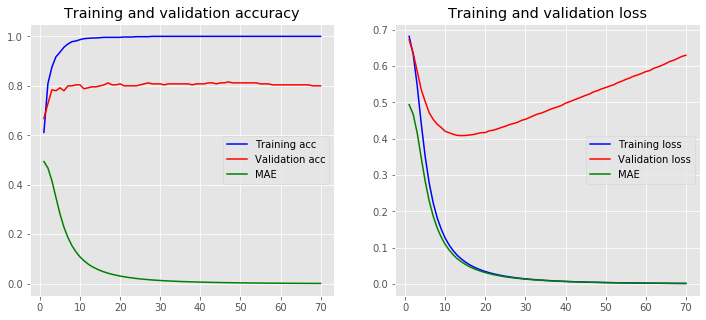

In [42]:
plot_history(history)